# Homework 6: 
## Riccardo Tancredi - riccardo.tancredi@studenti.unipd.it
---
Play with the Hopfield network code and/or the Jansen and Rit model code. Understand the code, and play with it. Generate some output (e.g. retrieve the memory input from the Hopfield network).

As an output, you can simply send me a doc/pdf file writing a couple of paragraph, explaining me what you have done, and what you have learn. It is enough half a page.

In [1]:
# Simulating the Hopfield model:
import numpy as np
import matplotlib.pyplot as plt
from hopfield import readPatterns, HopfieldNet
plt.rcParams.update({'font.size': 15})  
np.random.seed(23122023)

%matplotlib inline

Reading images and coverting to binary patterns...


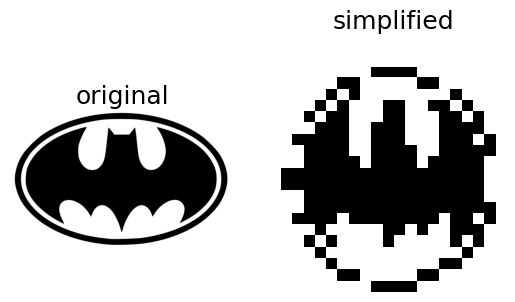

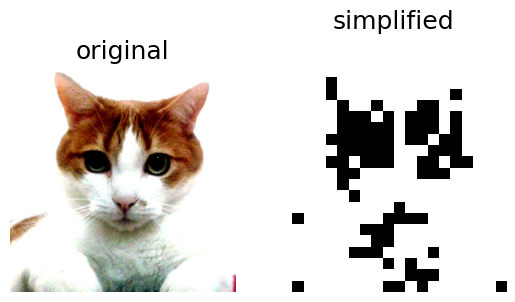

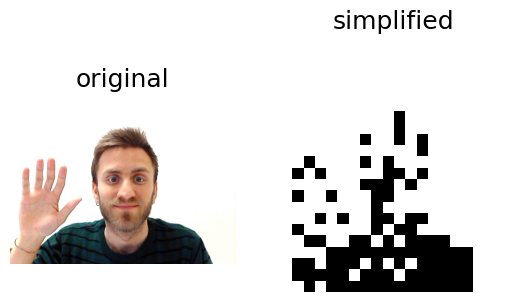

Done!


In [2]:
Lx = Ly = 20    # linear dimension
N = Lx*Ly       # number of neurons

# Images I want to store in the network
files = ["pyton_notebooks_lecture21/stored/batman.png", 
		 "pyton_notebooks_lecture21/stored/cat.jpg", 
		 "pyton_notebooks_lecture21/stored/jordi.jpg"]

print("Reading images and coverting to binary patterns...")
patterns = []
for fname in files:
	patterns.append(readPatterns(fname, size=[Lx,Ly]))
print("Done!")

In [3]:
# Create the network and learn the patterns
mynet = HopfieldNet(N, patterns)

The network is learning...
pattern  0
pattern  1
pattern  2
Done!


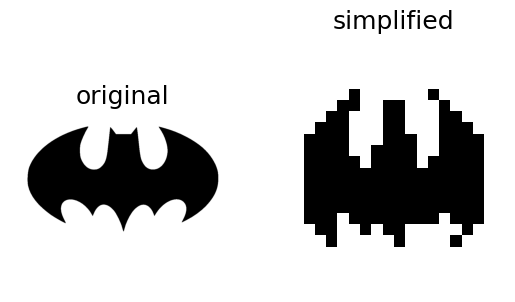

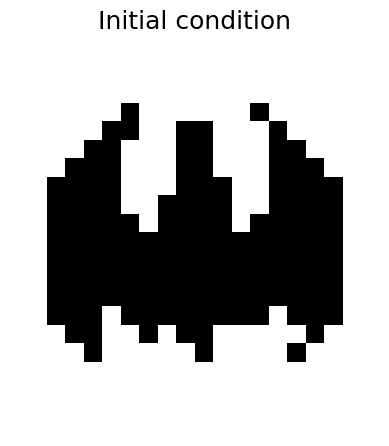

100%|██████████| 100000/100000 [01:44<00:00, 954.80it/s]


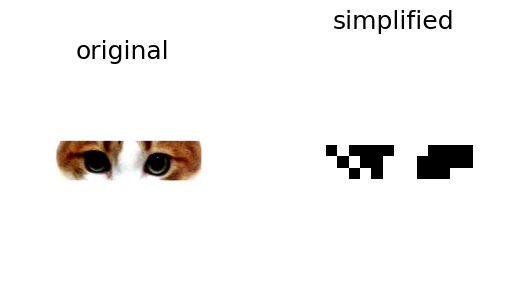

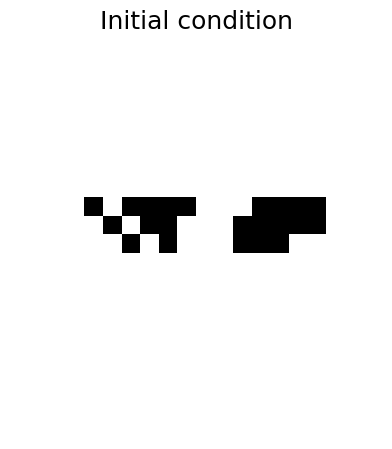

100%|██████████| 100000/100000 [01:47<00:00, 928.34it/s]


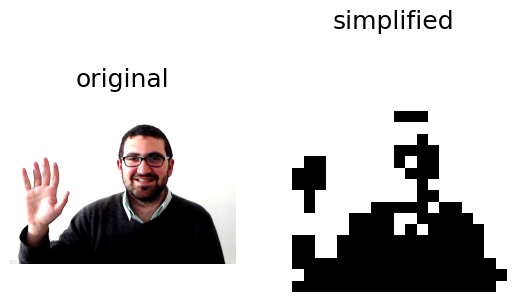

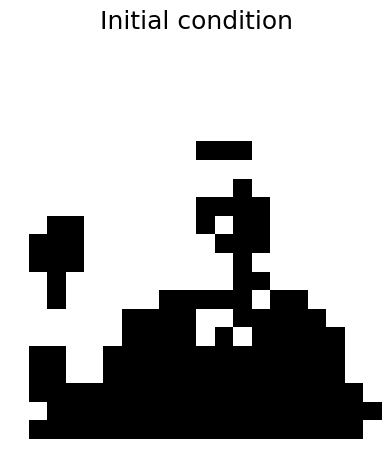

100%|██████████| 100000/100000 [01:54<00:00, 872.09it/s]


In [5]:
# Given a new input the goal is to retrieve the most similar memorized pattern in the network
inputs = ["pyton_notebooks_lecture21/inputs/batman3.png", 
          "pyton_notebooks_lecture21/inputs/cat2.jpg", 
          "pyton_notebooks_lecture21/inputs/samir.jpg"]

tot_iter = 100_000   # number of total iterations
outputs, energy = [], []

for path in range(len(patterns)):        
    newinput = readPatterns(inputs[path], size=[Lx,Ly]) # read the pattern from a file
    mynet.set_state(newinput) # set the pattern as the initial condition of the network 
    plt.matshow(np.resize(mynet.s, (Lx,Ly)), cmap=plt.cm.gray, fignum=path) # read the state (we reconvert it to a Lx*Ly matrix) and plot it
    plt.title("Initial condition")
    plt.axis('off')
    plt.show()

    mynet.evolve(steps=tot_iter)
    outputs.append(mynet.s)
    energy.append(mynet.energy)

I have modified the Hopfield class in order to get these results. The images sizes has been reduced too so to speed up the training.

Below the results and the comparison with the memorized patterns are shown.

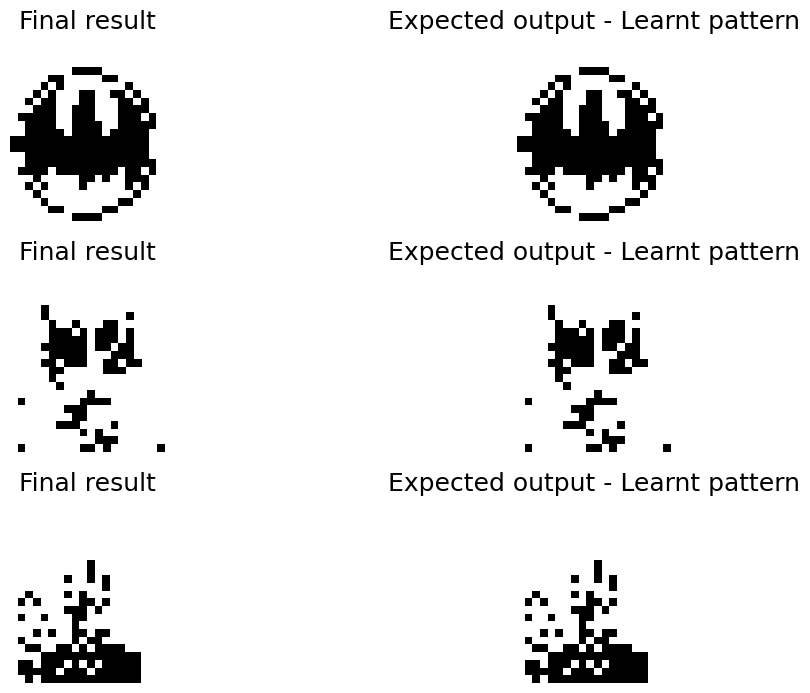

In [6]:
# Output figure and comparison:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
for i in range(len(patterns)):
    ax[i, 0].matshow(np.resize(outputs[i], (Lx,Ly)), cmap=plt.cm.gray) # read the state (we reconvert it to a Lx*Ly matrix) and plot it
    ax[i, 0].set_title("Final result")
    ax[i, 0].axis('off')

    ax[i, 1].matshow(np.resize(patterns[i], (Lx,Ly)), cmap=plt.cm.gray)
    ax[i, 1].set_title("Expected output - Learnt pattern")
    ax[i, 1].axis('off')
    plt.subplots_adjust(hspace=0.5)

plt.show()

One can immediately see that all the inputs converge to the closer expeted output which is an already learnt pattern.

Furthermore, one can easily plot the energy of the Hopfield network as a function of time. In the end, all the initial trials converge to the expected minimum energy.

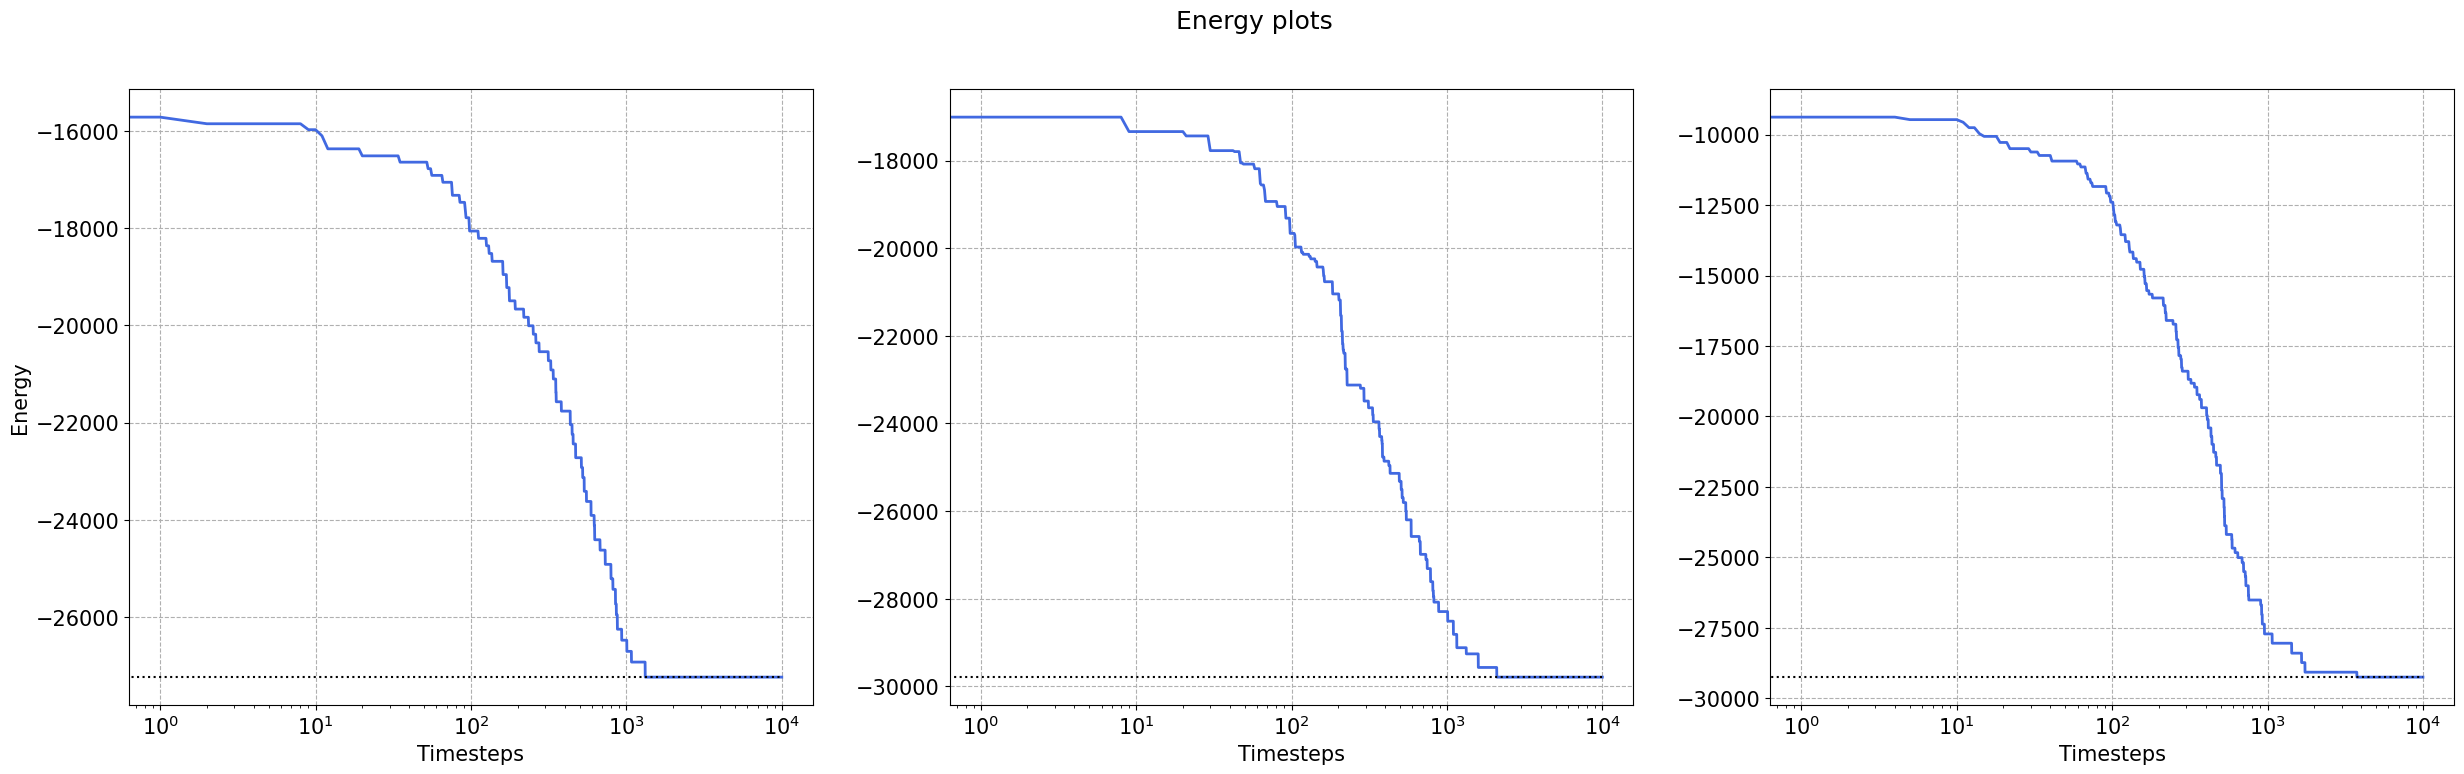

In [7]:
# Energy plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 8))
plt.suptitle('Energy plots')
for i in range(len(patterns)):
    ax[i].plot(np.array(energy[i][:10_000]), 
               label=r'$E$', color='royalblue', lw=2)
    minimum_en = -0.5*np.sum(mynet.w * np.outer(patterns[i], patterns[i]))
    ax[i].hlines(minimum_en, 0, 10_000, ls=':', color='k', lw=1.5)
    ax[i].set_xlabel('Timesteps')
    if i == 0:
        ax[i].set_ylabel('Energy')
    ax[i].set_xscale('log')
    ax[i].grid(ls='--')
    # ax[i].legend()
plt.show()